In [1]:
import pandas as pd
import numpy as np


data = pd.DataFrame({
    'AGE': ['Young','Young','Young','Young','Young','Middle','Middle','Middle','Middle','Middle',
            'Old','Old','Old','Old','Old'],
    'JOB_STATUS': [False,False,True,True,False,False,False,True,False,False,False,False,True,True,False],
    'OWNS_HOUSE': [False,False,False,True,False,False,False,True,True,True,True,True,False,False,False],
    'CREDIT_RATING': ['Fair','Good','Good','Fair','Fair','Fair','Good','Good','Excellent','Excellent',
                      'Excellent','Good','Good','Excellent','Fair'],
    'CLASS': ['No','No','Yes','Yes','No','No','No','Yes','Yes','Yes','Yes','Yes','Yes','Yes','No']
})


def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = -np.sum([(counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy


def info_gain(data, split_attribute, target_name="CLASS"):
    total_entropy = entropy(data[target_name])
    vals, counts = np.unique(data[split_attribute], return_counts=True)
    weighted_entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    return total_entropy - weighted_entropy


attributes = ['AGE','JOB_STATUS','OWNS_HOUSE','CREDIT_RATING']
ig_values = {attr: info_gain(data, attr) for attr in attributes}


ig_df = pd.DataFrame(list(ig_values.items()), columns=['Attribute','Information_Gain'])
print(ig_df)
print("\nRoot Node:", ig_df.loc[ig_df['Information_Gain'].idxmax(), 'Attribute'])


       Attribute  Information_Gain
0            AGE          0.083007
1     JOB_STATUS          0.323650
2     OWNS_HOUSE          0.419973
3  CREDIT_RATING          0.362990

Root Node: OWNS_HOUSE


TASk 2


(1000, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain    

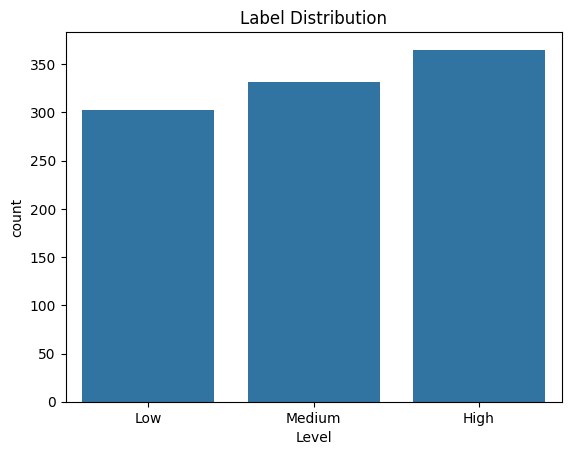

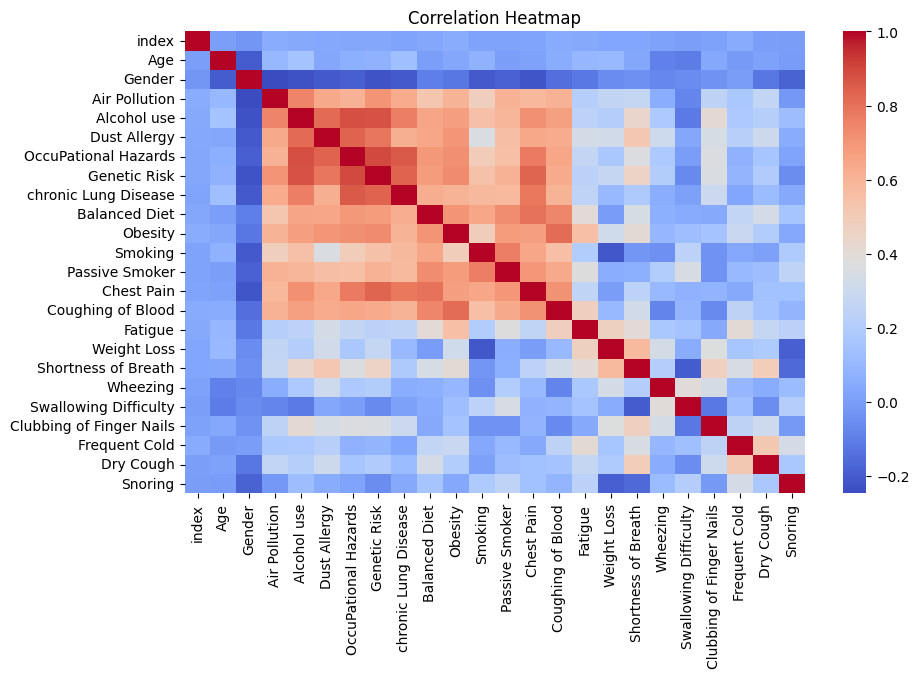

Selected Features: ['Gender']
Training Accuracy: 0.3964285714285714
Validation Accuracy: 0.3958333333333333
Testing Accuracy: 0.445


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("cancer.csv")


possible_labels = ['Age', 'Gender', 'Level', 'diagnosis', 'Outcome']

print(df.shape)
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())
print(df['Level'].value_counts())

sns.countplot(x='Level', data=df)
plt.title("Label Distribution")
plt.show()

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

corr_target = corr['Age'].drop('Age')
selected_features = corr_target[abs(corr_target) > 0.2].index.tolist()
print("Selected Features:", selected_features)

scaler = StandardScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

X = df[selected_features]
y = df['Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train2, y_train2)

print("Training Accuracy:", accuracy_score(y_train2, dt.predict(X_train2)))
print("Validation Accuracy:", accuracy_score(y_val, dt.predict(X_val)))
print("Testing Accuracy:", accuracy_score(y_test, dt.predict(X_test)))


TAsk 3

[Text(0.625, 0.9166666666666666, 'Course_Mathematics <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = No'),
 Text(0.5, 0.75, 'Course_English <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [5, 4]\nclass = No'),
 Text(0.5625, 0.8333333333333333, 'True  '),
 Text(0.375, 0.5833333333333334, 'Course_Programming <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = No'),
 Text(0.25, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.5, 0.4166666666666667, 'Time_Night <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]\nclass = No'),
 Text(0.25, 0.25, 'Prior_Experience_No <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = No'),
 Text(0.125, 0.08333333333333333, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.375, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(0.75, 0.25, 'Prior_Experience_Yes <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Yes'),
 Text(0.625, 0.08333333333333333, 'gi

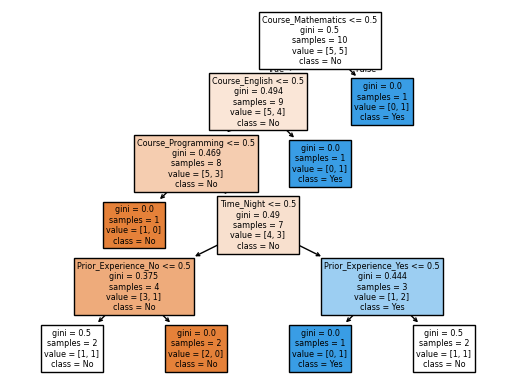

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
data = {'Prior_Experience':['Yes','No','Yes','No','Yes','No','Yes','Yes','Yes','Yes'],
        'Course':['Programming','Programming','History','Programming','English','Programming','Programming','Mathematics','Programming','Programming'],
        'Time':['Day','Day','Night','Night','Day','Day','Day','Night','Night','Night'],
        'Liked':['Yes','No','No','Yes','Yes','No','No','Yes','Yes','No']}
df=pd.DataFrame(data)
X=pd.get_dummies(df[['Prior_Experience','Course','Time']])
y=df['Liked']
model=DecisionTreeClassifier(criterion='gini')
model.fit(X,y)
tree.plot_tree(model,feature_names=X.columns,class_names=model.classes_,filled=True)
